In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier

from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/Social_Network_Ads.csv"

# Read the CSV file
dataset = pd.read_csv(file_path)

# Display first few rows
print(dataset.head())


Mounted at /content/drive
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:
# check missing and duplicate values
dataset.isnull().sum()
dataset.duplicated().sum()


np.int64(0)

In [4]:
# select Age and EstimatedSalary
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values


In [5]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
# Gradient Boosting model
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


In [8]:
# train model
classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [9]:
# predict test data
y_pred = classifier.predict(X_test)


In [10]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8625


In [11]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[47  5]
 [ 6 22]]


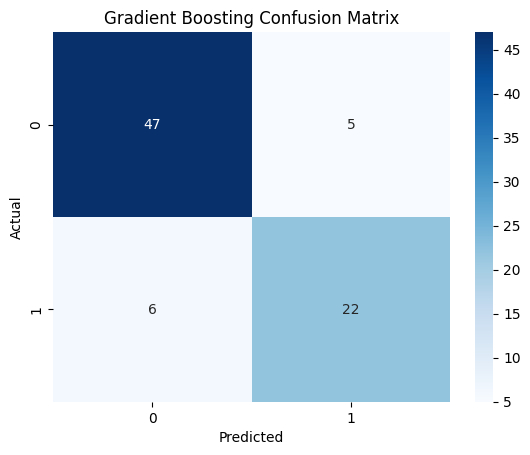

In [12]:
# visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()
